In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import os
import os.path as path
import wget


Derivada 8

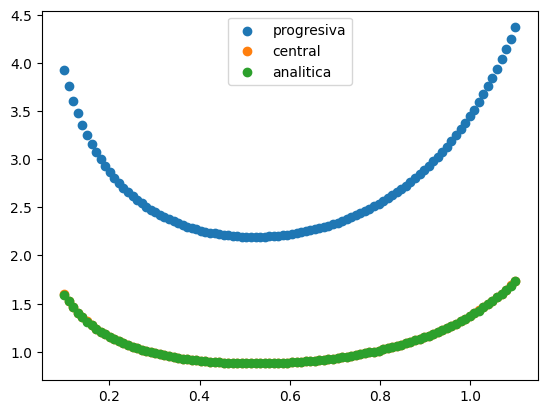

In [2]:
def fun(x):
    return np.sqrt(np.tan(x))

x = np.linspace(0.1,1.1,100)
#derivada progresiva
def derivadaP(f,x,h=0.01):
    return (4*f(x+h)-3*f(x)-f(x-h))/(2*h)

dfp= derivadaP(fun,x)

#derivada central
def derivadaC(f,x,h=0.01):
    return (f(x+h)-f(x-h))/(2*h)

dfc= derivadaC(fun,x)

#derivada analitica
def derivadaAnalitica(x):
    return 1/(2*((np.cos(x))**2)*np.sqrt(np.tan(x)))

dfa = derivadaAnalitica(x)

plt.scatter(x,dfp,label="progresiva")
plt.scatter(x,dfc,label="central")
plt.scatter(x,dfa,label="analitica")
plt.legend()

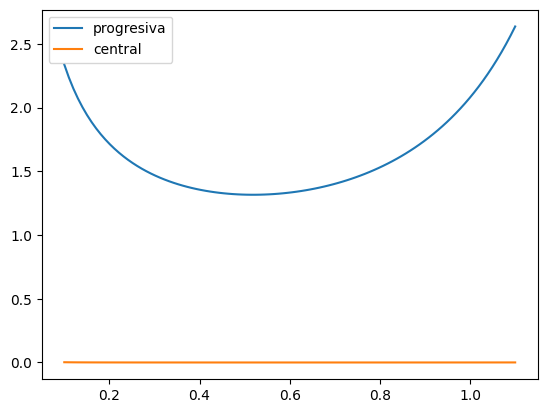

In [3]:
difp=np.abs(dfa-dfp)
difc=np.abs(dfa-dfc)
plt.plot(x,difp,label="progresiva")
plt.plot(x,difc,label="central")
plt.legend()

Raices de polinomios 3

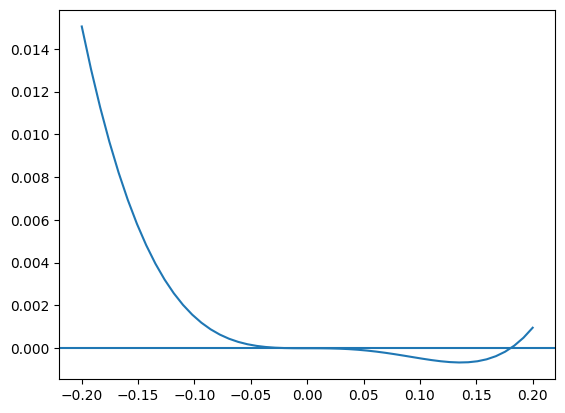

In [10]:
def pol(x):
    return 3*x**5 +5*x**4-x**3
x = np.linspace(-0.2,0.2,50)
y = pol(x)
plt.axhline(y=0)
plt.plot(x,y)

In [5]:
def derivada(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

def newton(f,df,ges,max=1000,pres=1e-6):
    error = 1
    parada = 0
    
    while error >pres and parada<max:
        
        try:
            x1 = ges- f(ges)/df(f,ges)
            error = np.abs(f(ges)/df(f,ges))
        except ZeroDivisionError:
            print("error de division")
            
        ges = x1
        parada +=1
    return ges

print("raiz 1:",round(newton(pol,derivada,-3),6))
print("raiz 2:",(round(newton(pol,derivada,0.5),6)))
print("raiz 3:",(round(newton(pol,derivada,-0.1),6)))

raiz 1: -1.847127
raiz 2: 0.18046
raiz 3: -1e-06


Interpolacion lagrange 4

---Archivo encontrado---


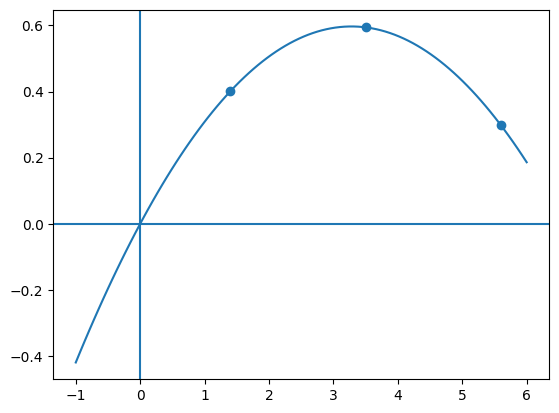

In [6]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/parcial.dat'
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/"

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file
    
Data = pd.read_csv(Path_,sep=',')

X = np.array(Data.X)
Y = np.array(Data.Y)


def lagrange(x,X,i):
    
    L = 1.
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L


def interpolacionLagrange(x,X,Y):
    
    span = 0.
    
    for i in range(X.shape[0]):
        span += lagrange(x,X,i)*Y[i]
        
    return span

x0 = np.linspace(-1,6,100)
y0 = interpolacionLagrange(x0,X,Y)

plt.plot(x0,y0)
plt.axhline(y=0)
plt.axvline(x=0)
plt.scatter(X,Y)

In [7]:
x = sym.Symbol('x',real=True)
f = interpolacionLagrange(x,X,Y)
f = sym.simplify(f)

f

x*(0.363970234266202 - 0.0554912422401579*x)

In [8]:
t = np.arctan(0.363970234266202)
"angulo de velocidad inicial: ", round(np.rad2deg(t),4), "°"


('angulo de velocidad inicial: ', 20.0, '°')

In [9]:
v = np.sqrt(9.8/(2*0.0554912422401579*(np.cos(t)**2)))
"velocidad inicial : ", v, "m/s"

('velocidad inicial : ', 10.0, 'm/s')